## Progressive Pig

- Player choose a move: hold or roll

- if roll
    - roll a single die (1-6)
    - if value == 1:
       - turn total = 0
       - **player total +=1**
       - can't roll again 
    - else:
       - value is added turn total 
       - can roll again = choose between hold and roll
- if hold
    - **if turn total is zero, then player total +=1**
    - otherwise turn total is added to your total score
    - next player
 
- game ends when 1 player reaches max score (100)



- What is a state? [player 1 score, player2 score, turn total, last die roll]
- What is a move?  "hold" or "roll"

In [1]:
from Game import *
from Game.minimax import *

Version:  0.3.08


In [2]:
def initial_state():
    player_1_score=0
    player_2_score=0
    turn_total=0
    last_die_roll=0

    state=[player_1_score,player_2_score,turn_total,last_die_roll]
    return state

In [3]:
def show_state(state,player):
    player_1_score,player_2_score,turn_total,last_die_roll=state
    print(f"Player 1 total is {player_1_score}")
    print(f"Player 2 total is {player_2_score}")    
    print(f"Last Die Roll {last_die_roll}")    
    print(f"The turn total is {turn_total}")
    

In [4]:
def valid_moves(state,player):
    return ["hold","roll"]

In [5]:
def update_state(state,player,move):
    player_1_score,player_2_score,turn_total,last_die_roll=state

    progressive=True  # removes infinite games
    
    if move=="hold":
        if progressive:
            if turn_total==0:
                turn_total=1  # minimum turn total
            
        if player==1:
            player_1_score+=turn_total
        else:
            player_2_score+=turn_total
        
        turn_total=0
        last_die_roll=0

    elif move=="roll":

        dice=random.randint(1,6) 
        last_die_roll=dice

        if dice==1:
            if progressive:
                if player==1:
                    player_1_score+=1
                else:
                    player_2_score+=1


            turn_total=0
        else:
            turn_total+=dice
            
    else:
        raise ValueError("You can't get there from here.")    


    state=[player_1_score,player_2_score,turn_total,last_die_roll]
    return state

In [6]:
def win_status(state,player):
    player_1_score,player_2_score,turn_total,last_die_roll=state

    max_score=21

    if player==1:
        if player_1_score+turn_total>=max_score:
            return "win"
    if player==2:
        if player_2_score+turn_total>=max_score:
            return "win"


In [7]:
def repeat_move(state,player,move):
    player_1_score,player_2_score,turn_total,last_die_roll=state
    if turn_total>0:
        return True
    else:
        return False
        

In [8]:
def monkey_move(state,player):
    return random.choice(valid_moves(state,player))
monkey_agent=random_agent=Agent(monkey_move)
random_move=monkey_move

In [9]:
def Q_move(state,player,info):
    Q=info.Q
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    α=info.α  # learning rate
    ϵ=info.ϵ  # how often to take a random move
    γ=info.γ  # memory constant -- how quickly does the table update back in time (earlier in the game)
    
    # \alpha <hit tab>    α
    # \epsilon <hit tab>  ϵ
    # \gamma <hit tab>    γ
    
    if state not in Q:
        actions=valid_moves(state,player)
        Q[state]=Table()
        for action in actions:
            Q[state][action]=0  # initial value of table
    
    if learning:
        if random.random()<ϵ:  # take a random move occasionally to explore the environment
            move=random_move(state,player)
        else:
            move=top_choice(Q[state])
    else:
        move=top_choice(Q[state])
    
    if not last_action is None:  # not the first move
        reward=0
        
        # learn
        if learning:
            Q[last_state][last_action]+=α*(reward +
                        γ*max([Q[state][a] for a in Q[state]]) - Q[last_state][last_action])
    
    return move

In [10]:
def Q_after(status,player,info):
    Q=info.Q
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    α=info.α  # learning rate
    ϵ=info.ϵ  # how often to take a random move
    γ=info.γ  # memory constant -- how quickly does the table update back in time (earlier in the game)
    
    # \alpha <hit tab>    α
    # \epsilon <hit tab>  ϵ
    # \gamma <hit tab>    γ

    if status=='lose':
        reward=-1
    elif status=='win':
        reward=1
    elif status=='stalemate':
        reward=.5 # value stalemate a little closer to a win
    else:
        reward=0
    
    
    if learning:
        Q[last_state][last_action]+=α*(reward - Q[last_state][last_action])
        


In [11]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_after
Q1_agent.Q=Table()  # makes an empty table
Q1_agent.learning=True

Q1_agent.α=0.4  # learning rate
Q1_agent.ϵ=0.5  # how often to take a random move
Q1_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [12]:
Q2_agent=Agent(Q_move)
Q2_agent.post=Q_after
Q2_agent.Q=Table()  # makes an empty table
Q2_agent.learning=True

Q2_agent.α=0.4  # learning rate
Q2_agent.ϵ=0.5  # how often to take a random move
Q2_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [13]:
def minimax_move(state,player):
    values,moves=minimax_values(state,player,display=False)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [16]:
g=Game()
g.run(random_agent,minimax_agent)

====
Game  1
Player 1 total is 0
Player 2 total is 0
Last Die Roll 0
The turn total is 0
Player 1 moves hold
Player 1 total is 1
Player 2 total is 0
Last Die Roll 0
The turn total is 0
Player 2 moves roll
Player 1 total is 1
Player 2 total is 0
Last Die Roll 6
The turn total is 6
Player 2 moves roll
Player 1 total is 1
Player 2 total is 0
Last Die Roll 6
The turn total is 12
Player 2 moves hold
Player 1 total is 1
Player 2 total is 12
Last Die Roll 0
The turn total is 0
Player 1 moves roll
Player 1 total is 1
Player 2 total is 12
Last Die Roll 6
The turn total is 6
Player 1 moves roll
Player 1 total is 1
Player 2 total is 12
Last Die Roll 3
The turn total is 9
Player 1 moves hold
Player 1 total is 10
Player 2 total is 12
Last Die Roll 0
The turn total is 0
Player 2 moves hold
Player 1 total is 10
Player 2 total is 13
Last Die Roll 0
The turn total is 0
Player 1 moves roll
Player 1 total is 10
Player 2 total is 13
Last Die Roll 3
The turn total is 3
Player 1 moves roll
Player 1 total is

[1]

minimax plays badly!  :-)

### But what about Q?

In [25]:
from tqdm.notebook import tqdm

In [27]:
agent1=Q1_agent
agent1.Q=Table()
agent2=Q2_agent
agent2.Q=Table()

In [28]:
S=Storage()
one,two,ties,N=0,0,0,0

In [29]:
N_test=100
N_train=100

In [30]:
for i in tqdm(range(2000)):
    Q1_agent.learning=True
    Q2_agent.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    result=g.run(agent1,agent2)

    
    Q1_agent.learning=False
    Q2_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    result=g.run(agent1,agent2)
    one,two,ties,N=one+result.count(1),two+result.count(2),ties+result.count(0),N+len(result)
    
    S+=one/N*100,two/N*100,ties/N*100,N


  0%|          | 0/2000 [00:00<?, ?it/s]

In [31]:
y1,y2,y0,x=S.arrays()

In [32]:
%matplotlib inline
from matplotlib.pyplot import figure,plot,grid,legend,xlabel,ylabel,title

Text(0, 0.5, 'Percent')

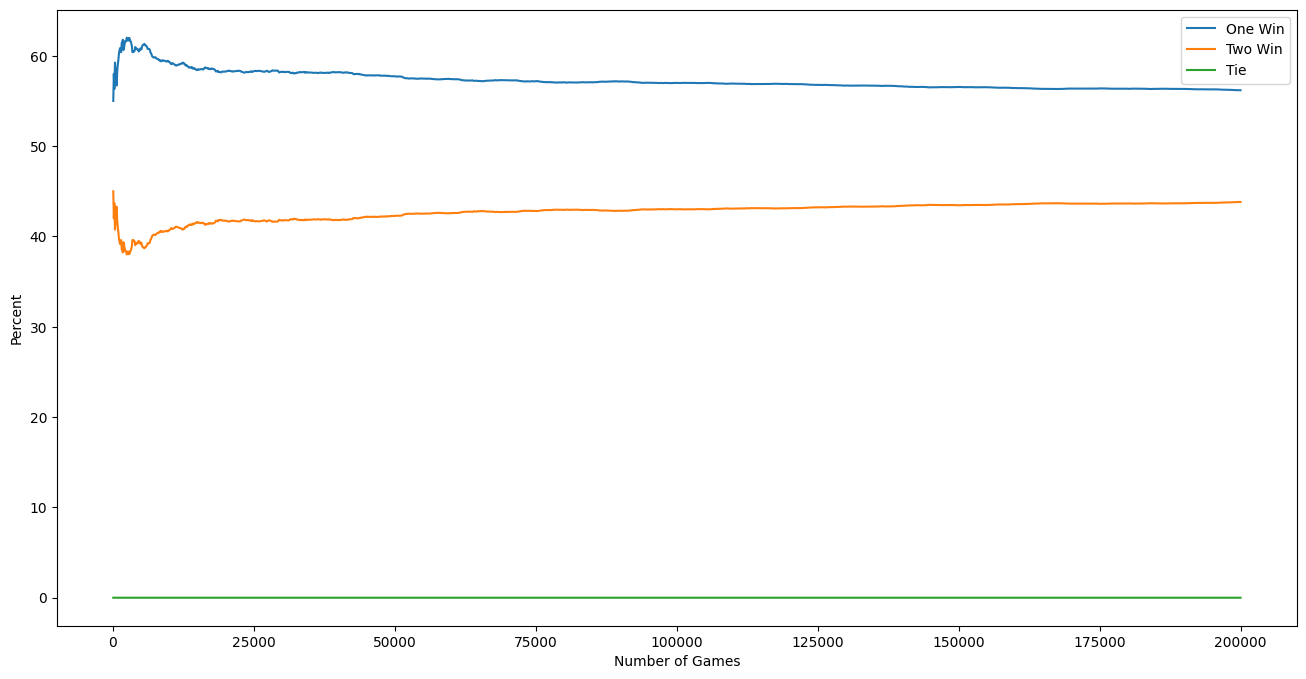

In [33]:
figure(figsize=(16,8))
plot(x,y1,label='One Win')
plot(x,y2,label='Two Win')
plot(x,y0,label='Tie')
legend()
xlabel('Number of Games')
ylabel('Percent')